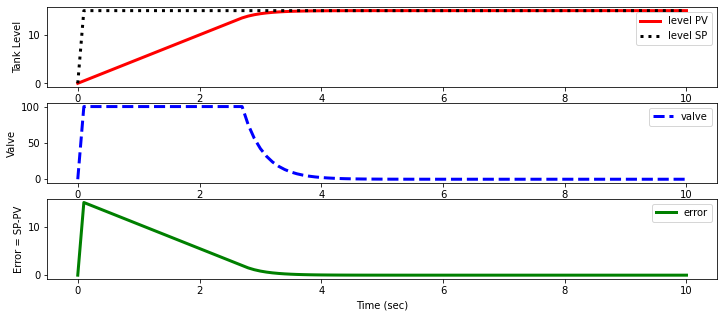

In [6]:
# solution
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

# animate plots?
animate=False # True / False

# define tank model
def tank(Level,time,c,valve):
    rho = 1000.0 # water density (kg/m^3)
    A = 1.0      # tank area (m^2)
    # calculate derivative of the Level
    dLevel_dt = (c/(rho*A)) * valve
    return dLevel_dt

# time span for the simulation for 10 sec, every 0.1 sec
ts = np.linspace(0,10,101)

# valve operation
c = 50.0          # valve coefficient (kg/s / %open)
u = np.zeros(101) # u = valve % open

# level initial condition
Level0 = 0

# initial valve position
valve = 0

# for storing the results
z = np.zeros(101)
es = np.zeros(101)
sps = np.zeros(101)

# TO DO: what is the value for ubias?
ubias = 0

# TO DO: decide on a tuning value for Kc
Kc = 50.0

# TO DO: record the desired level (set point)
SP = 15

plt.figure(1,figsize=(12,5))
if animate:
    plt.ion()
    plt.show()
    make_gif = True
    try:
        import imageio  # required to make gif animation
    except:
        print('install imageio with "pip install imageio" to make gif')
        make_gif=False
    if make_gif:
        try:
            import os
            images = []
            os.mkdir('./frames')
        except:
            print('Figure directory failed')
            make_gif=False

# simulate with ODEINT
for i in range(100):
    # calculate the error
    error = SP - Level0

    # TO DO: put P-only controller here
    valve = ubias + Kc * error
    valve = max(0,valve)
    valve = min(100,valve)

    u[i+1] = valve   # store the valve position
    es[i+1] = error  # store the error 
    y = odeint(tank,Level0,[0,0.1],args=(c,valve))
    Level0 = y[-1] # take the last point
    z[i+1] = Level0 # store the level for plotting
    sps[i+1] = SP

    if animate:
        # update plot
        plt.clf()
        plt.subplot(3,1,1)
        plt.plot(ts[0:i+1],z[0:i+1],'r-',linewidth=3,label='level PV')
        plt.plot(ts[0:i+1],sps[0:i+1],'k:',linewidth=3,label='level SP')
        plt.ylabel('Tank Level')
        plt.legend(loc='best')
        plt.subplot(3,1,2)
        plt.plot(ts[0:i+1],u[0:i+1],'b--',linewidth=3,label='valve')
        plt.ylabel('Valve')    
        plt.legend(loc='best')
        plt.subplot(3,1,3)
        plt.plot(ts[0:i+1],es[0:i+1],'g-',linewidth=3,label='error')
        plt.ylabel('Error = SP-PV')
        plt.xlabel('Time (sec)')
        plt.legend(loc='best')
        filename='./frames/frame_'+str(1000+i)+'.png'
        plt.savefig(filename)
        if make_gif:
            images.append(imageio.imread(filename))
        plt.pause(0.1)

if not animate:
    # plot results
    plt.subplot(3,1,1)
    plt.plot(ts,z,'r-',linewidth=3,label='level PV')
    plt.plot(ts,sps,'k:',linewidth=3,label='level SP')
    plt.ylabel('Tank Level')
    plt.legend(loc='best')
    plt.subplot(3,1,2)
    plt.plot(ts,u,'b--',linewidth=3,label='valve')
    plt.ylabel('Valve')    
    plt.legend(loc='best')
    plt.subplot(3,1,3)
    plt.plot(ts,es,'g-',linewidth=3,label='error')
    plt.ylabel('Error = SP-PV')    
    plt.xlabel('Time (sec)')
    plt.legend(loc='best')
    plt.show()
else:
    # create animated GIF
    if make_gif:
        imageio.mimsave('animate.gif', images)